In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../DATA/cement_slump.csv')

In [4]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

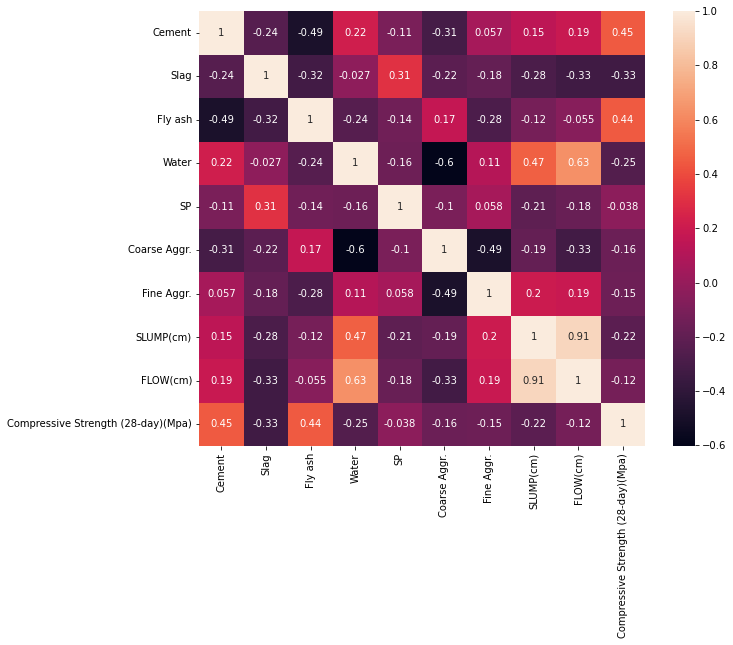

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [9]:
X=df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [10]:
y=df['Compressive Strength (28-day)(Mpa)']

# Train| Test and Split

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [16]:
from sklearn.svm import SVR,LinearSVR

In [19]:
# help(SVR)

In [20]:
base_model=SVR()

In [21]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [22]:
base_pred=base_model.predict(scaled_X_test)

# Model Evaluation

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mean_absolute_error(y_test, base_pred)

4.284806720840753

In [26]:
np.sqrt(mean_squared_error(y_test, base_pred))

5.768499715904773

In [27]:
y_test.mean()

35.0183870967742

In [28]:
base_pred.mean()

35.551110323949466

# Grid Search

In [29]:
param_grid={'C':[0.001, 0.01, 0.1, 0.5,1],
           'kernel':['linear', 'rbf', 'poly'],
           'gamma': ['scale', 'auto'],
           'degree':[2,3,4],
           'epsilon':[0,0.01,0.1,0.5,1,2]}

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
svr=SVR()

In [33]:
grid_svr=GridSearchCV(svr, param_grid)


In [35]:
grid_svr.fit(scaled_X_train, y_train)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [36]:
grid_svr.best_estimator_

SVR(C=1, degree=2, epsilon=2, kernel='linear')

In [37]:
grid_svr.best_params_


{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [38]:
grid_pred=grid_svr.predict(scaled_X_test)

In [39]:
mean_absolute_error(y_test, grid_pred)

1.7886531760620037

In [40]:
np.sqrt(mean_squared_error(y_test, grid_pred))

2.218406266489937